In [16]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("/Users/cheryl/Downloads/FoodAccessResearchAtlasData2019.xlsx")


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import random

import thinkstats2
import thinkplot

In [21]:
# Load the dataset
data = pd.read_excel('/Users/cheryl/Downloads/FoodAccessResearchAtlasData2019.xlsx')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary of the dataset
print("\nSummary of the dataset:")
print(data.info())

# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(data.describe())

First few rows of the dataset:
   CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0  0.000000                  0  ...   
1                  0     181.0  8.341014                  1  ...   
2                  0       0.0  0.000000                  0  ...   
3                  0       0.0  0.000000                  0  ...   
4                  0     181.0  1.681219                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.

### Week 2: Python Basics, Data Quality, Traditional Data Profiling vs Exploratory Data Analysis


In [28]:
#### Data Quality and Cleaning

# Checking for missing values
print("\nMissing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)

# Filling missing values with the mean for continuous variables
data.fillna(data.mean(), inplace=True)

# Ensure categorical variables are handled
if 'Urban' in data.columns:
    data['Urban'].fillna(data['Urban'].mode()[0], inplace=True)

# Verifying missing values are handled
print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values in each column:
CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        0
TractOMultir     0
TractHispanic    0
TractHUNV        0
TractSNAP        0
Length: 147, dtype: int64

Missing values after cleaning:
CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        0
TractOMultir     0
TractHispanic    0
TractHUNV        0
TractSNAP        0
Length: 147, dtype: int64


/var/folders/mq/8p56glg57dn85zhn6f63jxmr0000gn/T/ipykernel_4453/769741967.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


### Week 3: Exploratory Data Analysis and Distributions


Descriptive statistics:
        CensusTract         Urban       Pop2010       OHU2010  \
count  7.253100e+04  72531.000000  72531.000000  72531.000000   
mean   2.782573e+10      0.760626   4256.739022   1609.191821   
std    1.581647e+10      0.426704   1955.987626    725.676046   
min    1.001020e+09      0.000000      1.000000      0.000000   
25%    1.212708e+10      1.000000   2899.000000   1108.000000   
50%    2.712979e+10      1.000000   4011.000000   1525.000000   
75%    4.103900e+10      1.000000   5330.500000   2021.000000   
max    5.604595e+10      1.000000  37452.000000  16043.000000   

       GroupQuartersFlag      NUMGQTRS      PCTGQTRS  LILATracts_1And10  \
count       72531.000000  72531.000000  72531.000000       72531.000000   
mean            0.007114    110.121549      2.708678           0.128125   
std             0.084046    443.855238      9.569232           0.334231   
min             0.000000      0.000000      0.000000           0.000000   
25%           

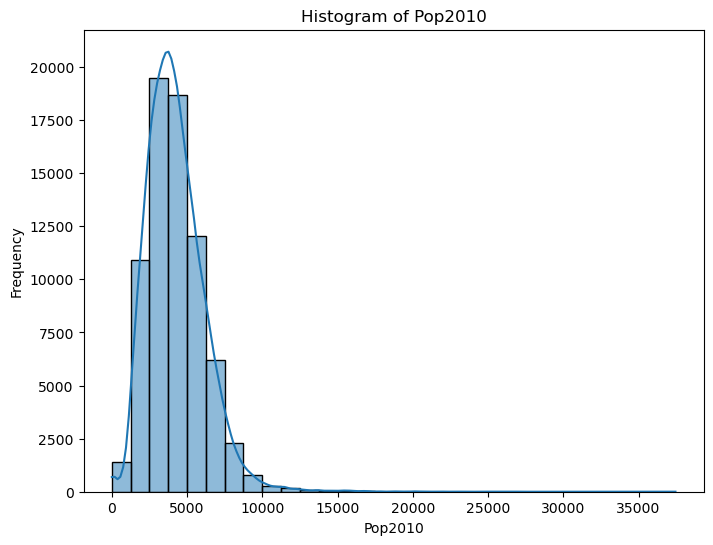

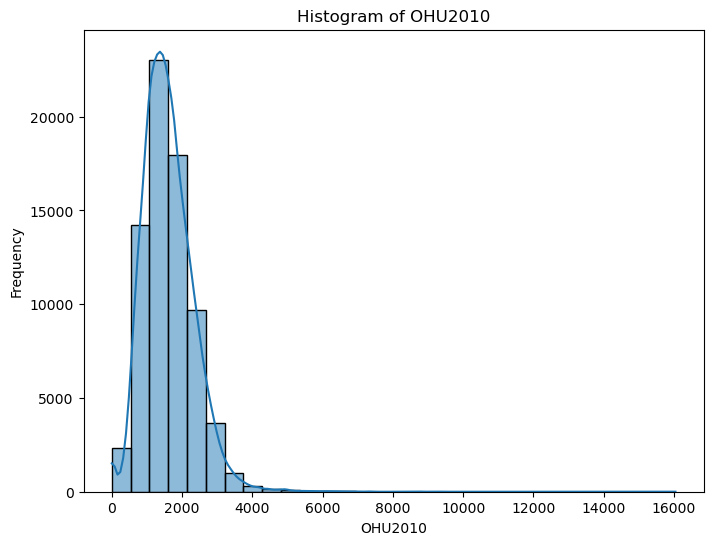

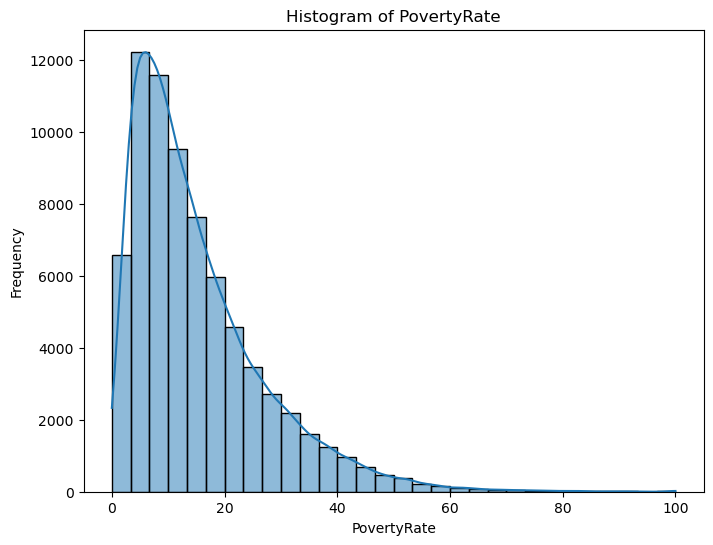

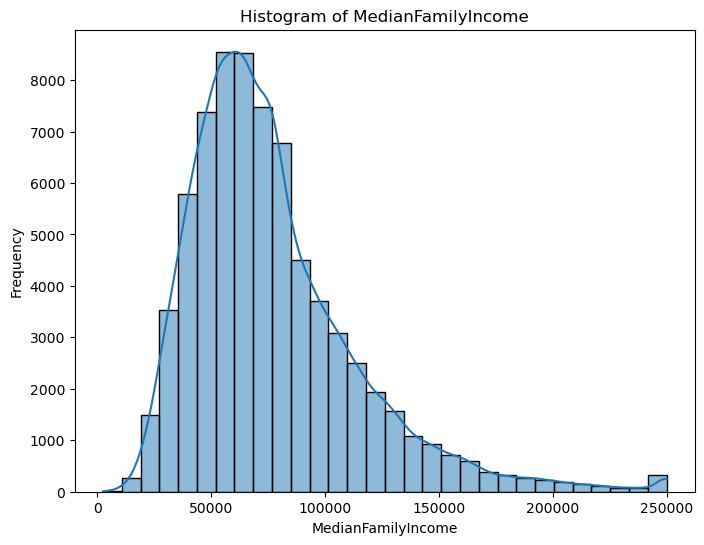

In [29]:

#### Descriptive Statistics and Histograms

import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
desc_stats = data.describe()
print("\nDescriptive statistics:")
print(desc_stats)

# Histograms for continuous variables
continuous_vars = ['Pop2010', 'OHU2010', 'PovertyRate', 'MedianFamilyIncome']

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


### Week 4: Probability Mass Functions & Cumulative Distribution Functions


/var/folders/mq/8p56glg57dn85zhn6f63jxmr0000gn/T/ipykernel_4453/2884585968.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(values, pmf, basefmt=" ", use_line_collection=True)


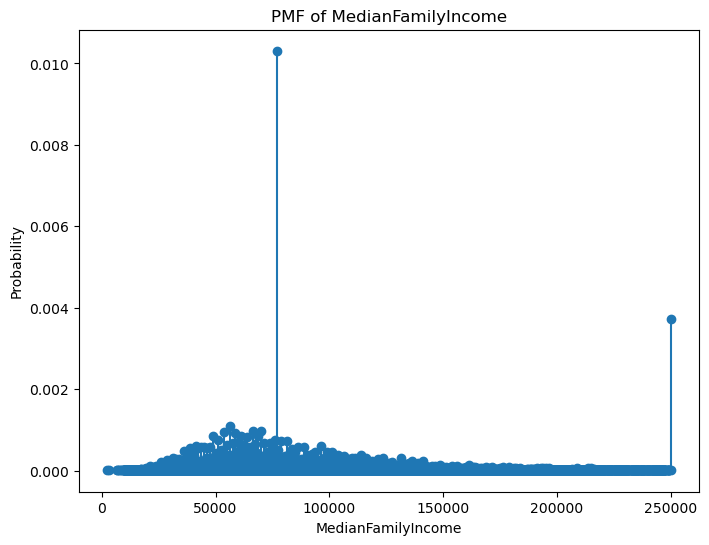

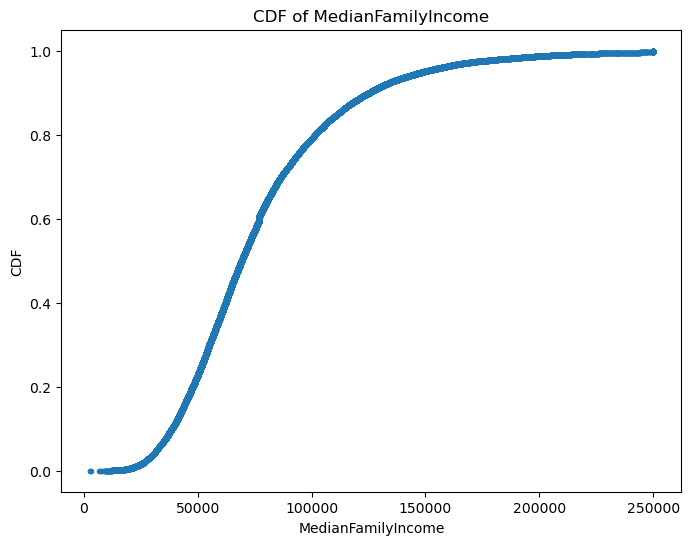

In [42]:

#### PMF and CDF

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# PMF for MedianFamilyIncome
def plot_pmf(data, column):
    values, counts = np.unique(data[column].dropna(), return_counts=True)
    pmf = counts / sum(counts)
    plt.figure(figsize=(8, 6))
    plt.stem(values, pmf, basefmt=" ", use_line_collection=True)
    plt.title(f'PMF of {column}')
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.show()

plot_pmf(data, 'MedianFamilyIncome')

# CDF for MedianFamilyIncome
def plot_cdf(data, column):
    sorted_data = np.sort(data[column].dropna())
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    plt.title(f'CDF of {column}')
    plt.xlabel(column)
    plt.ylabel('CDF')
    plt.show()

plot_cdf(data, 'MedianFamilyIncome')


### Week 5: Modeling Distributions & Probability Density Functions


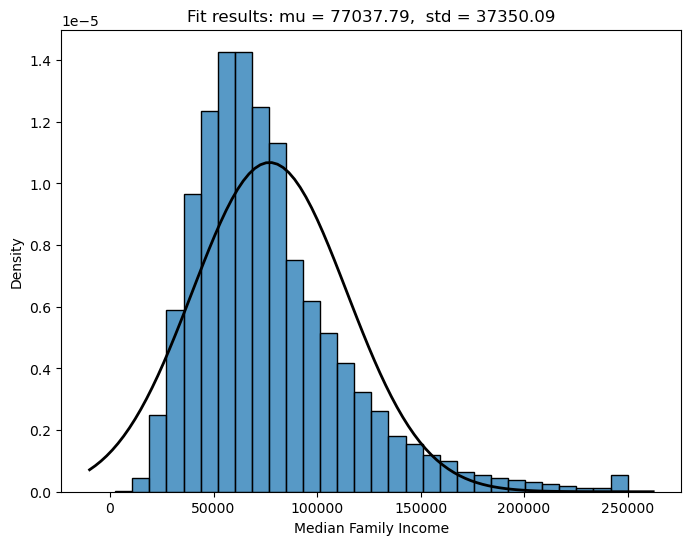

In [32]:

####  Fitting and Plotting Distributions

from scipy.stats import norm
import numpy as np

# Fit a normal distribution to the MedianFamilyIncome data
mu, std = norm.fit(data['MedianFamilyIncome'].dropna())

# Plot the histogram and PDF
plt.figure(figsize=(8, 6))
sns.histplot(data['MedianFamilyIncome'].dropna(), kde=False, bins=30, stat='density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.xlabel('Median Family Income')
plt.ylabel('Density')
plt.show()


### Week 6: Relationships Between Variables & Estimation

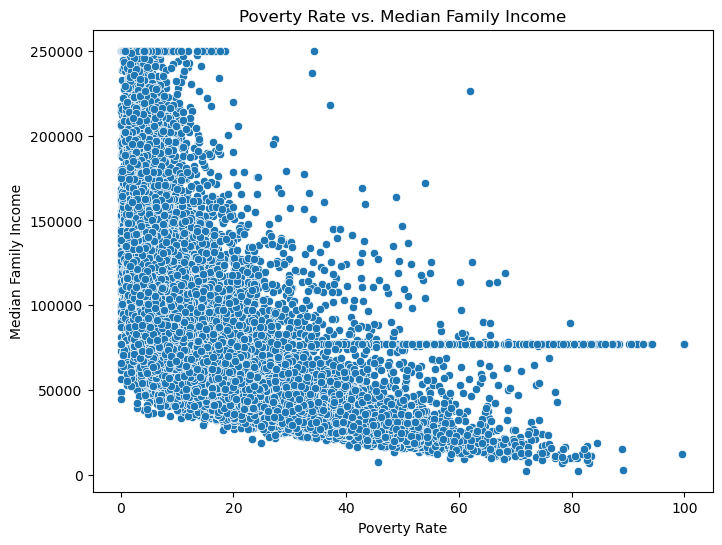

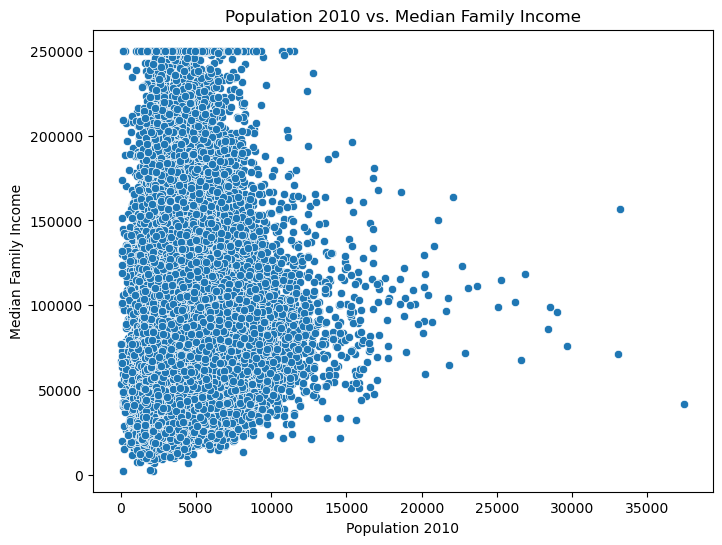

Pearson Correlation (Poverty Rate vs. Median Family Income): -0.63
Pearson Correlation (Population 2010 vs. Median Family Income): 0.11


In [33]:

#### Scatter Plots and Correlation Analysis

# Scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PovertyRate', y='MedianFamilyIncome', data=data)
plt.title('Poverty Rate vs. Median Family Income')
plt.xlabel('Poverty Rate')
plt.ylabel('Median Family Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pop2010', y='MedianFamilyIncome', data=data)
plt.title('Population 2010 vs. Median Family Income')
plt.xlabel('Population 2010')
plt.ylabel('Median Family Income')
plt.show()

# Pearson correlation
from scipy.stats import pearsonr

corr_poverty, _ = pearsonr(data['PovertyRate'].dropna(), data['MedianFamilyIncome'].dropna())
corr_pop, _ = pearsonr(data['Pop2010'].dropna(), data['MedianFamilyIncome'].dropna())
print(f'Pearson Correlation (Poverty Rate vs. Median Family Income): {corr_poverty:.2f}')
print(f'Pearson Correlation (Population 2010 vs. Median Family Income): {corr_pop:.2f}')

### Week 7: Hypothesis Testing & Linear Least Squares


In [34]:

####  Hypothesis Testing

from scipy.stats import ttest_ind

# Define urban and rural groups
urban = data[data['Urban'] == 1]
rural = data[data['Urban'] == 0]

# T-tests
t_test_income = ttest_ind(urban['MedianFamilyIncome'].dropna(), rural['MedianFamilyIncome'].dropna())
print(f'T-test (Median Family Income - Urban vs. Rural):')
print(f'  t-statistic: {t_test_income.statistic:.2f}')
print(f'  p-value: {t_test_income.pvalue:.4f}')


T-test (Median Family Income - Urban vs. Rural):
  t-statistic: 26.62
  p-value: 0.0000


In [36]:

####  Linear Least Squares

import statsmodels.api as sm

# Linear regression model: MedianFamilyIncome ~ PovertyRate + Pop2010
X = data[['PovertyRate', 'Pop2010']]
X = sm.add_constant(X)
y = data['MedianFamilyIncome']

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     MedianFamilyIncome   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 2.415e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:25:48   Log-Likelihood:            -8.4802e+05
No. Observations:               72531   AIC:                         1.696e+06
Df Residuals:                   72528   BIC:                         1.696e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.057e+05    309.465    341.496      

### Week 8: Regression

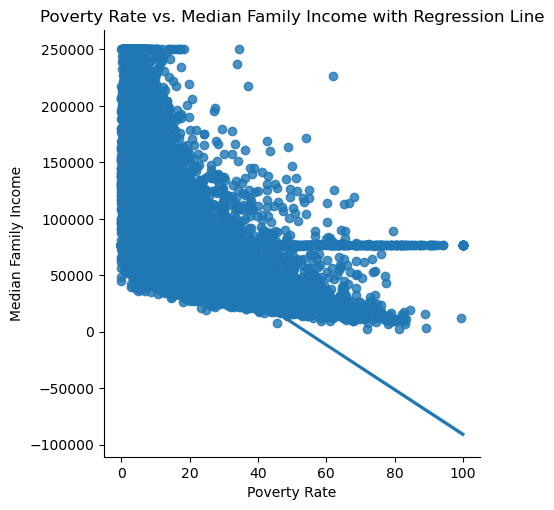

In [37]:

####  Regression Analysis
# Plotting the regression line
sns.lmplot(x='PovertyRate', y='MedianFamilyIncome', data=data)
plt.title('Poverty Rate vs. Median Family Income with Regression Line')
plt.xlabel('Poverty Rate')
plt.ylabel('Median Family Income')
plt.show()


### Week 9: Time Series Analysis

### Week 10: Survival Analysis & Data Modeling Basics

In [41]:
####  Survival Analysis

# Logistic Regression: LowIncomeTracts ~ PovertyRate + Pop2010 + OHU2010
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
X = data[['PovertyRate', 'Pop2010', 'OHU2010']].dropna()
y = data['LowIncomeTracts'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11540  1136]
 [ 1864  7220]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     12676
           1       0.86      0.79      0.83      9084

    accuracy                           0.86     21760
   macro avg       0.86      0.85      0.86     21760
weighted avg       0.86      0.86      0.86     21760

